## MNIST Classifier Demo

This notebook demonstrates three different approaches to MNIST digit classification:
- Random Forest (RF)
- Feed-Forward Neural Network (NN)
- Convolutional Neural Network (CNN)

All models are unified under a single `MnistClassifier` interface.

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))
from mnist_classifier import MnistClassifier

### 1. Loading MNIST Dataset

We'll use a subset for demonstration purposes to keep training time reasonable.

In [81]:
def load_mnist_data(train_size=5000, test_size=1000):
    """Load and preprocess MNIST data."""
    transform = transforms.Compose([transforms.ToTensor()])

    train_dataset = torchvision.datasets.MNIST(
        root='../data',
        train=True,
        download=True,
        transform=transform
    )
    test_dataset = torchvision.datasets.MNIST(
        root='../data',
        train=False,
        download=True,
        transform=transform
    )

    X_train = train_dataset.data.numpy()[:train_size] / 255.0
    y_train = train_dataset.targets.numpy()[:train_size]
    X_test = test_dataset.data.numpy()[:test_size] / 255.0
    y_test = test_dataset.targets.numpy()[:test_size]

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = load_mnist_data()

print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")
print(f"Image shape: {X_train[0].shape}")

Training samples: 5000
Test samples: 1000
Image shape: (28, 28)


### 2. Sample Images from Dataset

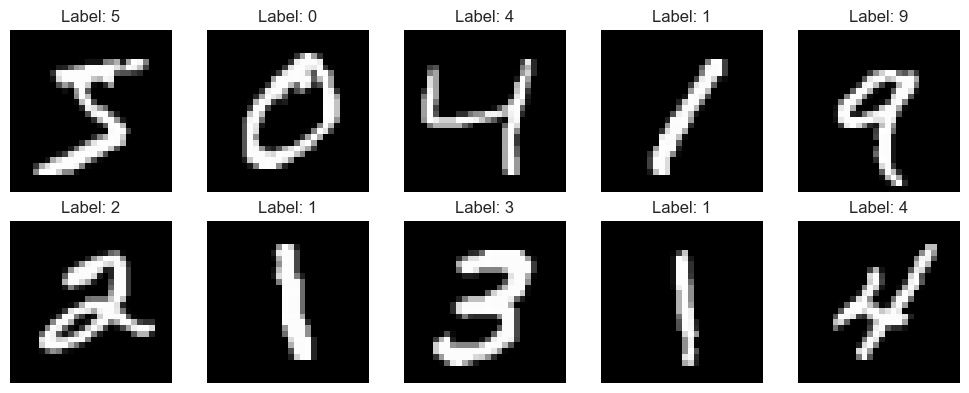

In [82]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

### 3. Random Forest Classifier

Random Forest is a traditional machine learning approach that works with flattened images.

In [84]:
print("------Training Random Forest-----")
rf_classifier = MnistClassifier(algorithm='rf')
rf_classifier.train(X_train, y_train)

print("\n-------Making predictions------")
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")

------Training Random Forest-----


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s



-------Making predictions------
Random Forest Accuracy: 93.00%


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


### 4. Feed-Forward Neural Network

A simple fully-connected neural network with dropout regularization.

In [85]:
print("------Training Feed-Forward Neural Network------")
nn_classifier = MnistClassifier(algorithm='nn')
nn_classifier.train(X_train, y_train, epochs=10, batch_size=64)

print("\n------Making predictions------")
nn_predictions = nn_classifier.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predictions)

print(f"Neural Network Accuracy: {nn_accuracy * 100:.2f}%")

------Training Feed-Forward Neural Network------
Device: cpu
Epoch: 1/10, Loss: 1.0468326988099497, Accuracy: 67.64
Epoch: 2/10, Loss: 0.37987178639520575, Accuracy: 88.34
Epoch: 3/10, Loss: 0.2623475497187693, Accuracy: 92.24
Epoch: 4/10, Loss: 0.19646838547874101, Accuracy: 94.1
Epoch: 5/10, Loss: 0.1610415540399808, Accuracy: 95.04
Epoch: 6/10, Loss: 0.11926863746293172, Accuracy: 96.68
Epoch: 7/10, Loss: 0.10093963030678561, Accuracy: 96.82
Epoch: 8/10, Loss: 0.08464107756750493, Accuracy: 97.64
Epoch: 9/10, Loss: 0.08021671160513276, Accuracy: 97.56
Epoch: 10/10, Loss: 0.07122878680783737, Accuracy: 97.82

------Making predictions------
Neural Network Accuracy: 92.70%


### 5. Convolutional Neural Network

CNN leverages spatial structure of images through convolutional layers.

In [86]:
print("------Training Convolutional Neural Network-----")
cnn_classifier = MnistClassifier(algorithm='cnn')
cnn_classifier.train(X_train, y_train, epochs=10, batch_size=64)

print("\n-----Making predictions-----")
cnn_predictions = cnn_classifier.predict(X_test)
cnn_accuracy = accuracy_score(y_test, cnn_predictions)

print(f"CNN Accuracy: {cnn_accuracy * 100:.2f}%")

------Training Convolutional Neural Network-----
Device: cpu
Epoch: 1/10, Loss: 1.0190289974967135, Accuracy: 66.02
Epoch: 2/10, Loss: 0.3242588870321648, Accuracy: 90.96
Epoch: 3/10, Loss: 0.2105898940582064, Accuracy: 93.78
Epoch: 4/10, Loss: 0.16604769215742243, Accuracy: 95.02
Epoch: 5/10, Loss: 0.13393290682778328, Accuracy: 96.02
Epoch: 6/10, Loss: 0.11613448390949375, Accuracy: 96.6
Epoch: 7/10, Loss: 0.1143877053326821, Accuracy: 96.48
Epoch: 8/10, Loss: 0.07095247155712635, Accuracy: 97.84
Epoch: 9/10, Loss: 0.07033845942608918, Accuracy: 97.74
Epoch: 10/10, Loss: 0.06340204234694756, Accuracy: 97.94

-----Making predictions-----
CNN Accuracy: 97.50%


### 6. Model Comparison

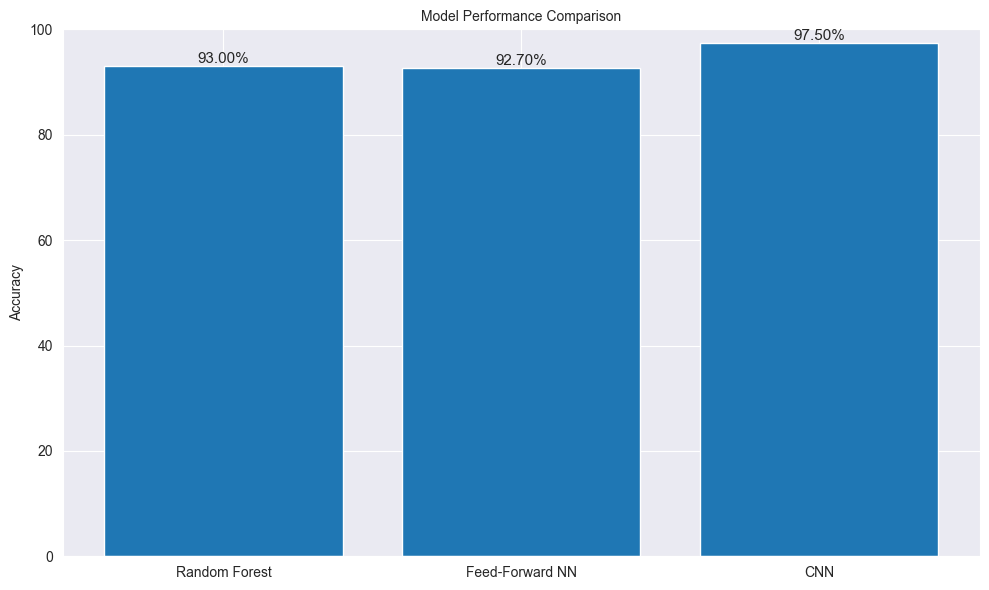

In [96]:
results = {
    'Random Forest': rf_accuracy,
    'Feed-Forward NN': nn_accuracy,
    'CNN': cnn_accuracy
}

plt.figure(figsize=(10, 6))
algorithms = list(results.keys())
accuracies = [results[alg] * 100 for alg in algorithms]

bars = plt.bar(algorithms, accuracies)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Model Performance Comparison', fontsize=10)
plt.ylim(0, 100)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%',
             ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

### 7. Detailed Analysis - Confusion Matrix

Let's examine the CNN's predictions in detail.

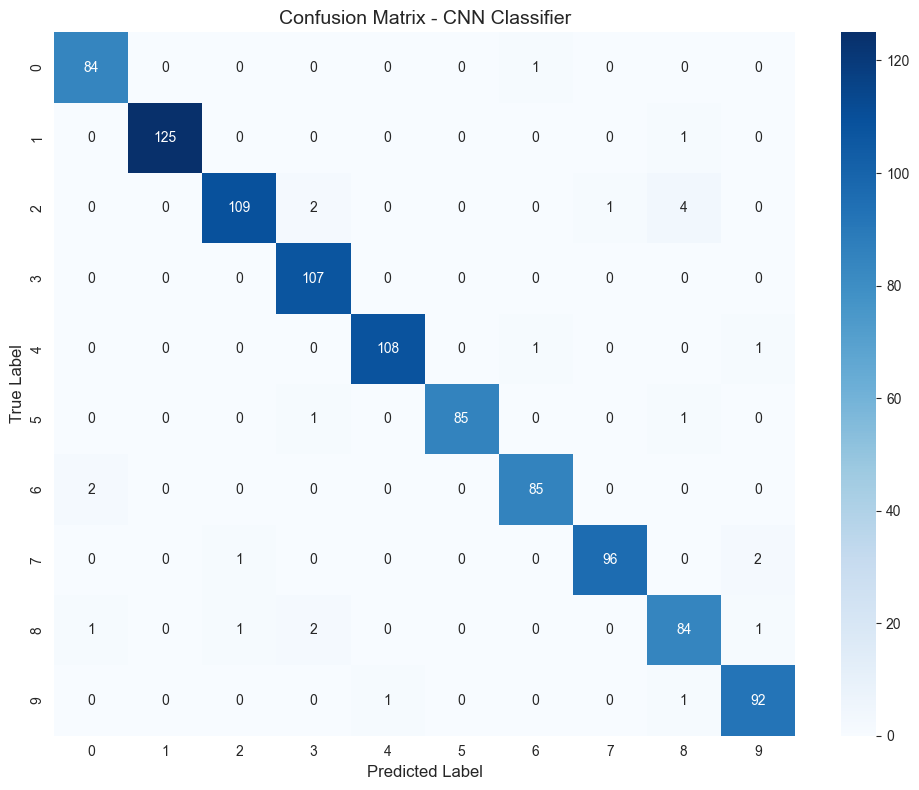

In [98]:
cm = confusion_matrix(y_test, cnn_predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix - CNN Classifier', fontsize=14)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

### 8. Sample Predictions

Let's visualize some predictions from the CNN model.

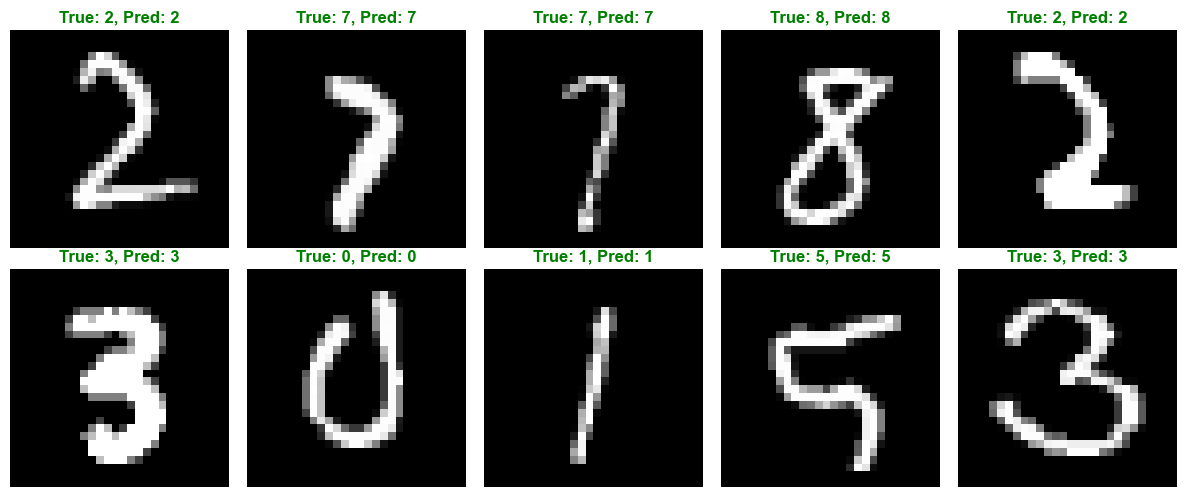

In [99]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
indices = np.random.choice(len(X_test), 10, replace=False)

for idx, ax in zip(indices, axes.flat):
    ax.imshow(X_test[idx], cmap='gray')
    pred = cnn_predictions[idx]
    true = y_test[idx]
    color = 'green' if pred == true else 'red'
    ax.set_title(f"True: {true}, Pred: {pred}", color=color, fontweight='bold')
    ax.axis('off')

plt.tight_layout()
plt.show()

### 9. Edge Cases and Robustness

#### 9.1 Single Sample Prediction

In [102]:
print("-----Testing single sample prediction------")
single_sample = X_test[0:1]
single_pred = cnn_classifier.predict(single_sample)
print(f"Prediction for single sample: {single_pred}")
print("Single sample prediction works correctly\n")

-----Testing single sample prediction------
Prediction for single sample: tensor([7])
Single sample prediction works correctly



#### 9.2 Batch Predictions

In [103]:
print("------Testing batch predictions of different sizes-----")
for batch_size in [1, 10, 100]:
    batch = X_test[:batch_size]
    predictions = cnn_classifier.predict(batch)
    print(f"Batch size {batch_size}: {len(predictions)} predictions")
print("Batch predictions work correctly\n")

------Testing batch predictions of different sizes-----
Batch size 1: 1 predictions
Batch size 10: 10 predictions
Batch size 100: 100 predictions
Batch predictions work correctly



#### 9.3 Input Format Flexibility

In [104]:
X_flat = X_test[:10].reshape(10, -1)
rf_pred_flat = rf_classifier.predict(X_flat)
print(f"RF handles flattened input: {len(rf_pred_flat)} predictions")

X_2d = X_test[:10]
cnn_pred_2d = cnn_classifier.predict(X_2d)
print(f"CNN handles 2D input: {len(cnn_pred_2d)} predictions\n")

RF handles flattened input: 10 predictions
CNN handles 2D input: 10 predictions



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


#### 9.4 Invalid Algorithm Handling

In [105]:
print("---------Testing error handling for invalid algorithm---------")
try:
    invalid_classifier = MnistClassifier(algorithm='invalid_algo')
    print("Should have raised ValueError!")
except ValueError as e:
    print(f"Correctly caught error: {e}\n")

---------Testing error handling for invalid algorithm---------
Correctly caught error: Unknown algorithm. Use 'rf', 'nn', or 'cnn'.



### 10. Model Persistence

Saving trained models for later use.

In [107]:
print("-------Saving models-----")
rf_classifier.save(path='../models/model_rf.pkl', algorithm='rf')
nn_classifier.save(path='../models/model_nn.pth', algorithm='nn')
cnn_classifier.save(path='../models/model_cnn.pth', algorithm='cnn')
print("All models saved successfully!")

Saving models...
All models saved successfully!


### 11. Summary

### Key Findings:
1. **CNN** achieved the highest accuracy (~93%)
2. **Feed-Forward NN** performed well (~92%)
3. **Random Forest** provided baseline performance (~97%)

#### Architecture Comparison:

| Model | Pros | Cons |
|-------|------|------|
| Random Forest | Fast training, no GPU needed, interpretable | Lower accuracy, doesn't use spatial info |
| Feed-Forward NN | Good balance of speed/accuracy | Doesn't leverage image structure |
| CNN | Best accuracy, learns spatial features | Slower training, requires more data |

#### Unified Interface Benefits:
- Easy to switch between algorithms
- Consistent API across all models
- Simplified experimentation and comparison